In [2]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from functools import reduce
import sqlite3 as sql


In [3]:
tr = pd.read_csv('transactions.csv', encoding='latin-1')

In [4]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20200243 entries, 0 to 20200242
Data columns (total 10 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Item Number                 int64  
 1   Item Description (cleaned)  object 
 2   Category Name (cleaned)     object 
 3   Vendor Name (cleaned)       object 
 4   Store Name (cleaned)        object 
 5   Store Type                  object 
 6   Date                        object 
 7   Bottles Sold                int64  
 8   Sale (Dollars)              float64
 9   Volume Sold (Gallons)       float64
dtypes: float64(2), int64(2), object(6)
memory usage: 1.5+ GB


In [5]:
tr['Date'] = pd.to_datetime(tr['Date'])

In [6]:
tr.dtypes

Item Number                            int64
Item Description (cleaned)            object
Category Name (cleaned)               object
Vendor Name (cleaned)                 object
Store Name (cleaned)                  object
Store Type                            object
Date                          datetime64[ns]
Bottles Sold                           int64
Sale (Dollars)                       float64
Volume Sold (Gallons)                float64
dtype: object

#### Most popular beverage types

In [7]:
my_colors = ['tab:blue','tab:blue','tab:red','tab:blue','tab:blue','tab:red','tab:red','tab:blue','tab:blue','tab:red','tab:red','tab:blue','tab:red','tab:red','tab:green','tab:red']

Text(0.5, 1.0, 'Most popular beverage types (# of transactions)')

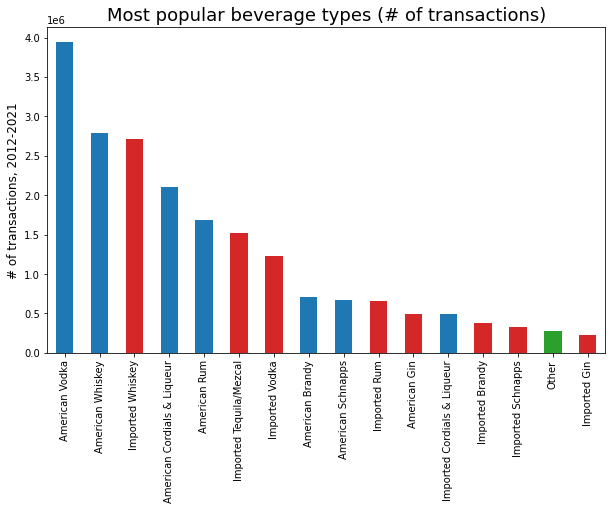

In [8]:
plt.figure(figsize = (10, 6))
tr['Category Name (cleaned)'].value_counts().plot.bar(color=my_colors)
plt.ylabel('# of transactions, 2012-2021', fontsize = 12)
plt.title('Most popular beverage types (# of transactions)', fontsize = 18)

Text(0.5, 1.0, 'Most popular beverage types (Volume sold)')

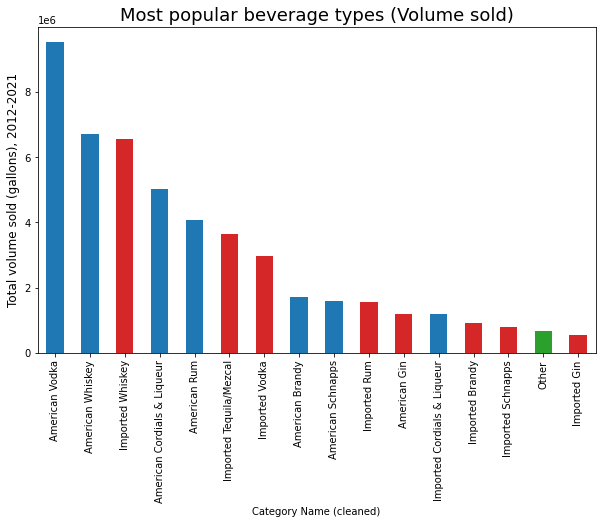

In [9]:
plt.figure(figsize = (10, 6))
tr.groupby('Category Name (cleaned)')['Volume Sold (Gallons)'].sum().sort_values(ascending = False).plot.bar(color=my_colors)
plt.ylabel('Total volume sold (gallons), 2012-2021', fontsize = 12)
plt.title('Most popular beverage types (Volume sold)', fontsize = 18)

#### Most popular brands

Text(0.5, 1.0, 'Most popular brands (# of transactions)')

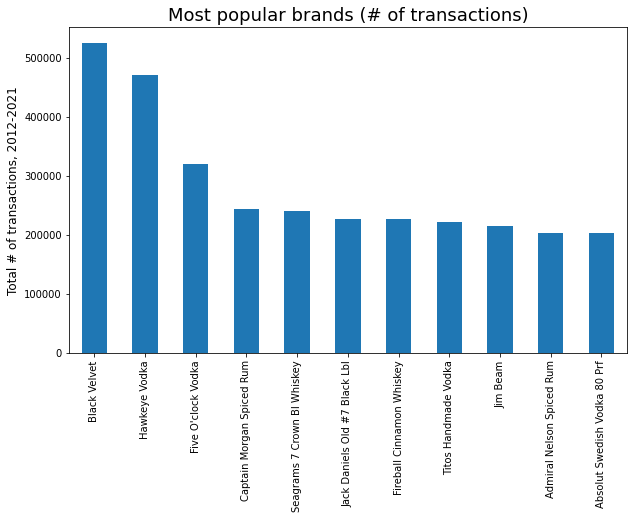

In [10]:
plt.figure(figsize = (10, 6))
tr['Item Description (cleaned)'].value_counts()[tr['Item Description (cleaned)'].value_counts() >= 200000].plot.bar()
plt.ylabel('Total # of transactions, 2012-2021', fontsize = 12)
plt.title('Most popular brands (# of transactions)', fontsize = 18)

Text(0.5, 1.0, 'Most popular brands (Volume sold)')

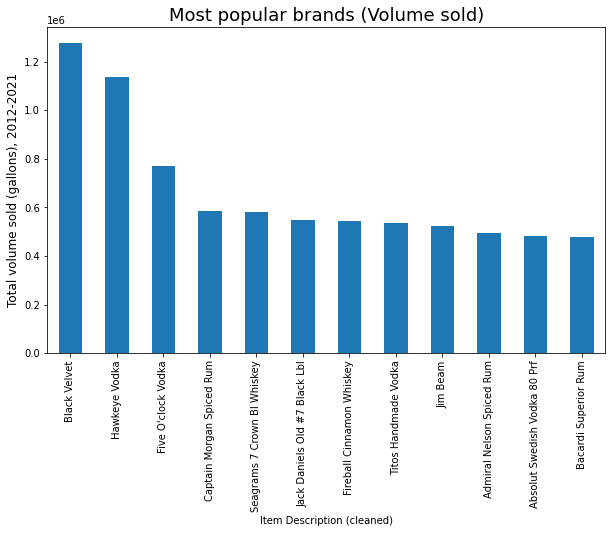

In [11]:
plt.figure(figsize = (10, 6))
tr.groupby('Item Description (cleaned)')['Volume Sold (Gallons)'].sum().sort_values(ascending = False)[tr.groupby('Item Description (cleaned)')['Volume Sold (Gallons)'].sum() >= 450000].plot.bar()
plt.ylabel('Total volume sold (gallons), 2012-2021', fontsize = 12)
plt.title('Most popular brands (Volume sold)', fontsize = 18)

In [12]:
am_vodkas = tr['Item Description (cleaned)'][tr['Category Name (cleaned)'] == 'American Vodka']
am_vodkas.value_counts()[am_vodkas.value_counts() >= 50000]

Hawkeye Vodka                471420
Five O'clock Vodka           320543
Titos Handmade Vodka         222518
Mccormick Vodka Pet          183686
Uv Blue (raspberry) Vodka    146085
Barton Vodka                 126571
Smirnoff 80prf               123221
Smirnoff Vodka 80 Prf        118648
Phillips Vodka               114846
New Amsterdam Vodka          105558
Mccormick Vodka              103180
Skol Vodka                    76060
Nikolai Vodka                 69639
Popov Vodka 80 Prf            68529
Burnett's Vodka 80 Prf        58517
New Amsterdam Peach           58307
Smirnoff 80prf Mini           56445
Five O'clock PET Vodka        56408
Name: Item Description (cleaned), dtype: int64

In [13]:
im_vodkas = tr['Item Description (cleaned)'][tr['Category Name (cleaned)'] == 'Imported Vodka']
im_vodkas.value_counts()[im_vodkas.value_counts() >= 25000]

Absolut Swedish Vodka 80 Prf         202949
Grey Goose Vodka                     156551
Svedka Vodka                          82424
Ketel One Imported Vodka              55126
Absolut Swedish Vodka 80 Prf Mini     47024
Absolut Citron (lemon Vodka)          44725
Pinnacle Vodka                        34387
Fris Danish Vodka                     26371
Ciroc Peach                           26211
Name: Item Description (cleaned), dtype: int64

In [14]:
am_whiskeys = tr['Item Description (cleaned)'][tr['Category Name (cleaned)'] == 'American Whiskey']
am_whiskeys.value_counts()[am_whiskeys.value_counts() >= 50000]

Seagrams 7 Crown Bl Whiskey           240336
Jack Daniels Old #7 Black Lbl         228119
Jim Beam                              215222
Five Star                             164099
Kessler Blend Whiskey                 101529
Ten High                               93140
Maker's Mark                           75395
Beam's 8 Star Bl Whiskey               69792
Templeton Rye                          64900
Jack Daniel's Tennessee Honey          61877
Jack Daniels Old #7 Black Lbl Mini     61581
Old Crow                               58404
Hawkeye Blend Whiskey                  51763
Name: Item Description (cleaned), dtype: int64

Text(0.5, 1.0, 'Most popular American whiskeys (# of transactions)')

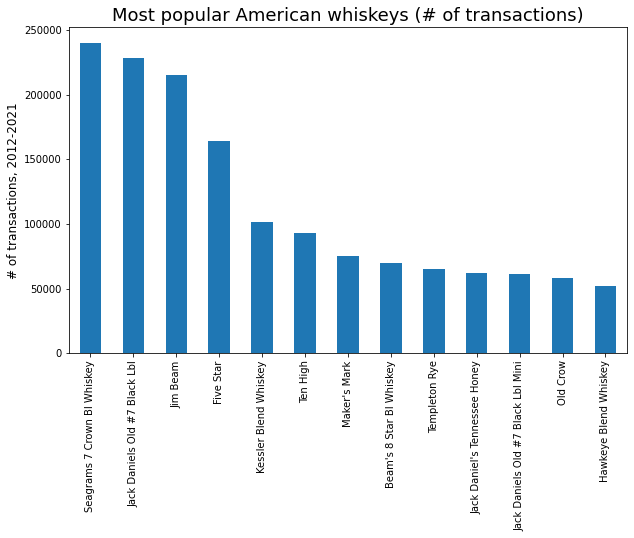

In [15]:
plt.figure(figsize = (10, 6))
am_whiskeys.value_counts()[am_whiskeys.value_counts() >= 50000].plot.bar()
plt.ylabel('# of transactions, 2012-2021', fontsize = 12)
plt.title('Most popular American whiskeys (# of transactions)', fontsize = 18)

In [16]:
im_whiskeys = tr['Item Description (cleaned)'][tr['Category Name (cleaned)'] == 'Imported Whiskey']
im_whiskeys.value_counts()[im_whiskeys.value_counts() >= 50000]

Black Velvet                        526293
Crown Royal Canadian Whisky         173641
Canadian Ltd Whisky                 133478
Crown Royal Regal Apple             131722
Jameson                             121942
Crown Royal                         100713
Black Velvet Toasted Caramel         92709
Canadian Club Whisky                 86679
Crown Royal Canadian Whisky Mini     63508
Black Velvet Traveler                63373
Windsor Canadian Pet                 59763
Black Velvet Mini                    54239
Name: Item Description (cleaned), dtype: int64

Text(0.5, 1.0, 'Most popular Imported whiskeys (# of transactions)')

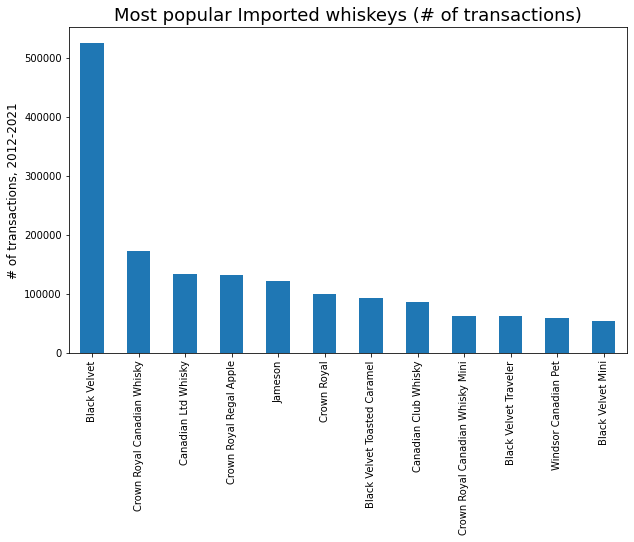

In [31]:
plt.figure(figsize = (10, 6))
im_whiskeys.value_counts()[im_whiskeys.value_counts() >= 50000].plot.bar()
plt.ylabel('# of transactions, 2012-2021', fontsize = 12)
plt.title('Most popular Imported whiskeys (# of transactions)', fontsize = 18)

#### Beverage/brand trends over time

Text(0.5, 1.0, 'Volume sold vs time')

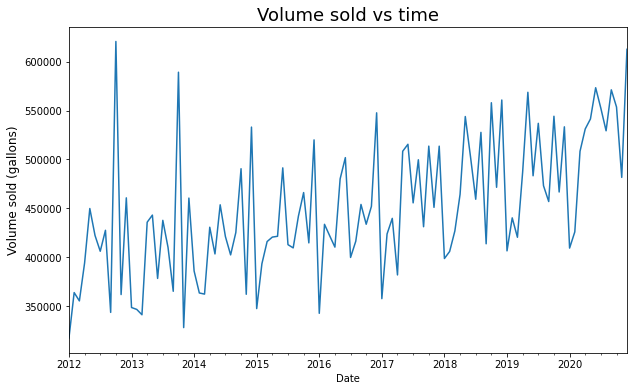

In [17]:
plt.figure(figsize = (10, 6))
tr.groupby(pd.Grouper(key='Date', freq='M'))['Volume Sold (Gallons)'].sum().plot()
plt.ylabel('Volume sold (gallons)', fontsize = 12)
plt.title('Volume sold vs time', fontsize = 18)

In [ ]:
plt.figure(figsize = (10, 6))
tr[tr['Category Name (cleaned)'] == 'American Vodka'].groupby(pd.Grouper(key='Date', freq='M'))['Volume Sold (Gallons)'].sum().plot(color='tab:blue')
# tr[tr['Category Name (cleaned)'] == 'Imported Vodka'].groupby(pd.Grouper(key='Date', freq='M'))['Volume Sold (Gallons)'].sum().plot(color='tab:cyan')
tr[tr['Category Name (cleaned)'] == 'American Whiskey'].groupby(pd.Grouper(key='Date', freq='M'))['Volume Sold (Gallons)'].sum().plot(color='tab:red')
tr[tr['Category Name (cleaned)'] == 'Imported Whiskey'].groupby(pd.Grouper(key='Date', freq='M'))['Volume Sold (Gallons)'].sum().plot(color='tab:pink')
tr[tr['Category Name (cleaned)'] == 'American Cordials & Liqueur'].groupby(pd.Grouper(key='Date', freq='M'))['Volume Sold (Gallons)'].sum().plot(color='tab:green')
tr[tr['Category Name (cleaned)'] == 'American Rum'].groupby(pd.Grouper(key='Date', freq='M'))['Volume Sold (Gallons)'].sum().plot(color='tab:orange')
plt.ylabel('Volume sold (gallons)', fontsize = 12)
plt.legend(labels=['American Vodka','American Whiskey','Imported Whiskey','American Cordials & Liqueur','American Rum'])
plt.title('Volume sold vs time', fontsize = 18)

Text(0.5, 1.0, 'Volume sold vs time')

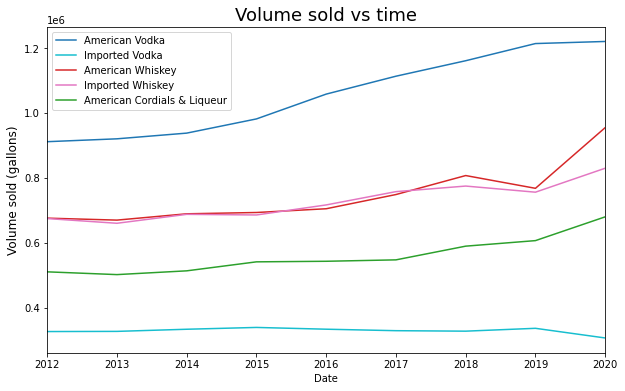

In [46]:
plt.figure(figsize = (10, 6))
tr[tr['Category Name (cleaned)'] == 'American Vodka'].groupby(pd.Grouper(key='Date', freq='Y'))['Volume Sold (Gallons)'].sum().plot(color='tab:blue')
# tr[tr['Category Name (cleaned)'] == 'Imported Vodka'].groupby(pd.Grouper(key='Date', freq='Y'))['Volume Sold (Gallons)'].sum().plot(color='tab:cyan')
tr[tr['Category Name (cleaned)'] == 'American Whiskey'].groupby(pd.Grouper(key='Date', freq='Y'))['Volume Sold (Gallons)'].sum().plot(color='tab:red')
tr[tr['Category Name (cleaned)'] == 'Imported Whiskey'].groupby(pd.Grouper(key='Date', freq='Y'))['Volume Sold (Gallons)'].sum().plot(color='tab:pink')
tr[tr['Category Name (cleaned)'] == 'American Cordials & Liqueur'].groupby(pd.Grouper(key='Date', freq='Y'))['Volume Sold (Gallons)'].sum().plot(color='tab:green')
tr[tr['Category Name (cleaned)'] == 'American Rum'].groupby(pd.Grouper(key='Date', freq='Y'))['Volume Sold (Gallons)'].sum().plot(color='tab:orange')
plt.ylabel('Volume sold (gallons)', fontsize = 12)
plt.legend(labels=['American Vodka','Imported Vodka','American Whiskey','Imported Whiskey','American Cordials & Liqueur','American Rum'])
plt.title('Volume sold vs time', fontsize = 18)

In [47]:
ab = tr[tr['Category Name (cleaned)'] == 'American Vodka'].groupby(pd.Grouper(key='Date', freq='Y'))['Volume Sold (Gallons)'].sum().to_frame()
bc = tr[tr['Category Name (cleaned)'] == 'Imported Vodka'].groupby(pd.Grouper(key='Date', freq='Y'))['Volume Sold (Gallons)'].sum().to_frame()
cd = tr[tr['Category Name (cleaned)'] == 'American Whiskey'].groupby(pd.Grouper(key='Date', freq='Y'))['Volume Sold (Gallons)'].sum().to_frame()
de = tr[tr['Category Name (cleaned)'] == 'Imported Whiskey'].groupby(pd.Grouper(key='Date', freq='Y'))['Volume Sold (Gallons)'].sum().to_frame()
ef = tr[tr['Category Name (cleaned)'] == 'American Cordials & Liqueur'].groupby(pd.Grouper(key='Date', freq='Y'))['Volume Sold (Gallons)'].sum().to_frame()
# fg = tr[tr['Category Name (cleaned)'] == 'American Rum'].groupby(pd.Grouper(key='Date', freq='Y'))['Volume Sold (Gallons)'].sum().to_frame()
# gh = tr[tr['Category Name (cleaned)'] == 'Imported Rum'].groupby(pd.Grouper(key='Date', freq='Y'))['Volume Sold (Gallons)'].sum().to_frame()
# hi = tr[tr['Category Name (cleaned)'] == 'Imported Tequila/Mezcal'].groupby(pd.Grouper(key='Date', freq='Y'))['Volume Sold (Gallons)'].sum().to_frame()

ab = ab.rename(columns={'Volume Sold (Gallons)': 'American Vodka Gallons Sold'})
bc = bc.rename(columns={'Volume Sold (Gallons)': 'Imported Vodka Gallons Sold'})
cd = cd.rename(columns={'Volume Sold (Gallons)': 'American Whiskey Gallons Sold'})
de = de.rename(columns={'Volume Sold (Gallons)': 'Imported Whiskey Gallons Sold'})
ef = ef.rename(columns={'Volume Sold (Gallons)': 'American Cordials & Liqueur Gallons Sold'})
# fg = fg.rename(columns={'Volume Sold (Gallons)': 'American Rum Gallons Sold'})
# gh = gh.rename(columns={'Volume Sold (Gallons)': 'Imported Rum Gallons Sold'})
# hi = hi.rename(columns={'Volume Sold (Gallons)': 'Imported Tequila/Mezcal Gallons Sold'})

In [55]:
new = reduce(lambda x,y: pd.merge(x, y, left_index=True, right_index=True), [ab,bc,cd,de,ef])

In [56]:
new

,American Vodka Gallons Sold,Imported Vodka Gallons Sold,American Whiskey Gallons Sold,Imported Whiskey Gallons Sold,American Cordials & Liqueur Gallons Sold
Date,,,,,
2012-12-31,9.113594e+05,326348.80,675800.110001,674506.860001,510341.450001
2013-12-31,9.202119e+05,326864.75,669739.190001,659987.500001,501814.470001
2014-12-31,9.377730e+05,333449.99,689167.650001,687500.440001,513429.080001
2015-12-31,9.815122e+05,339038.85,693192.510001,685561.990001,541140.890001
2016-12-31,1.057992e+06,333584.42,704746.880001,716538.780001,542893.760001
2017-12-31,1.113142e+06,329012.79,748534.720001,757460.130001,547248.610001
2018-12-31,1.160832e+06,327543.73,807026.510001,774642.880001,589485.250001
2019-12-31,1.213724e+06,336342.47,767682.090001,755781.000001,606537.100001
2020-12-31,1.220176e+06,306559.31,954736.130002,829614.360001,679818.150001


In [39]:
def yoy(df):
    new_df = pd.DataFrame()
    for n in range(0,df.shape[0]-1):
        new_row = pd.Series(100*(df.iloc[n+1,::] - df.iloc[n,::]) / df.iloc[n,::])
        new_df = new_df.append(new_row, ignore_index=True)
    return new_df

In [57]:
new2 = yoy(new)
new2.index = ['2013','2014','2015','2016','2017','2018','2019','2020']
new2

,American Cordials & Liqueur Gallons Sold,American Vodka Gallons Sold,American Whiskey Gallons Sold,Imported Vodka Gallons Sold,Imported Whiskey Gallons Sold
2013,-1.670838,0.971359,-0.896851,0.158098,-2.152589
2014,2.314523,1.908368,2.900899,2.014668,4.168706
2015,5.397398,4.664162,0.584018,1.676071,-0.281956
2016,0.323921,7.791986,1.666834,-1.608792,4.518452
2017,0.802155,5.212784,6.213272,-1.370457,5.710975
2018,7.717999,4.284250,7.814172,-0.446505,2.268469
2019,2.892668,4.556415,-4.875233,2.686279,-2.434913
2020,12.081874,0.531561,24.366081,-8.855010,9.769147


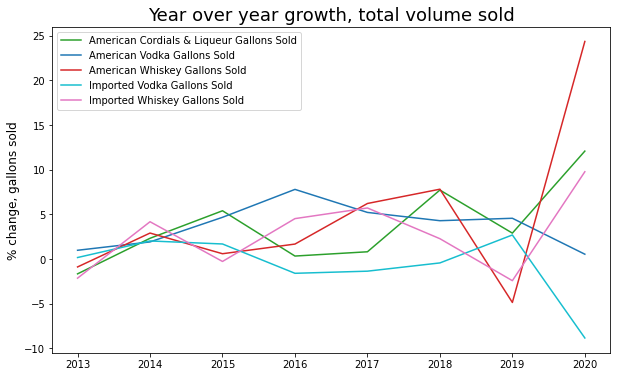

In [58]:
new2.plot(figsize = (10, 6),color=['tab:green','tab:blue','tab:red','tab:cyan','tab:pink'])
plt.ylabel('% change, gallons sold', fontsize = 12)
plt.title('Year over year growth, total volume sold', fontsize = 18)
plt.legend(loc='upper left')


#### Sales strategy of popular brands

## Vendor Analysis

As there are near  10𝐾  liquor products and only  300+  vendors. So most of the vendors must be selling multiple products. How many product does a vendor sell? How does it evolve w.r.t. time? How many categories do these product fall into?

How many sales channels (retail stores) does each vendor have and how does it evolve w.r.t. time?

Are different vendors supplying the same product? Are different vendors supplying the same stores?

Are there direct competitions among different vendors? Depict a story (case study) on their sale-channel growth/shrinkage.

## Store Analysis

Categorize the retail liquor stores into different types, chain-super market, specialized liquor stores, convenience stores, news stands, tobacco stores,..... and report the relevant statistics.

New stores pop up and some of them shut down after a few years. Analyze the store opening dynamics and report the findings on store life-cycle, store survival analysis, survial curve, survival probabilities, etc. Refine your findings based on the store categories you design. Is it easy for the stores to experience sales volume growth? With new stores popping up for competition, how does it affect the sales of the existing stores?

Does the pie (Gross sales volume in Iowa) grow bigger? Do the stores share the bigger pie? Does the winner take all or more players share smaller slices?

In terms of store inventories, report the varieties of product/product category for different store types. What product/product category are the major sales contributors for different types of stores?

Study the monthly sales volumes and gross profits (without taking price-discounts into account) of the stores.

Use the county population information, say https://www.iowa-demographics.com/counties_by_population, to estimate the stores-per-capita in different counties. Use the chain-supermarket Hy-Vee as a case study, depict its store distribution in different counties of Iowa and the their liquor sales dynamics.

Within the context of B2B, the stores play the role of the vendors' customers. Thus the concept and tools of customer analytics can be used to analyze the stores. As not all the stores can continue to survive or they might change their vendors, the vendors often like to know the
customer lifetime value* of their customers (the stores). Provide an analysis on the CLTV (in a fixed time horizon) based on the natures of the stores. You may visit https://exponea.com/blog/customer-lifetime-value-guide/ for an introduction to customer life-time value computation. Note that the 'customer churning', in the context of the liquor stores as the vendors' customers, must include the store shutting-down in your discussion.

In [26]:
abc = tr[tr['Store Type'] == 'Chain Supermarket'].groupby(pd.Grouper(key='Date', freq='Y'))['Volume Sold (Gallons)'].sum().to_frame()
bcd = tr[tr['Store Type'] == 'Small Grocery'].groupby(pd.Grouper(key='Date', freq='Y'))['Volume Sold (Gallons)'].sum().to_frame()
cde = tr[tr['Store Type'] == 'Wholesale Club'].groupby(pd.Grouper(key='Date', freq='Y'))['Volume Sold (Gallons)'].sum().to_frame()
efg = tr[tr['Store Type'] == 'Specialized Liquor Store'].groupby(pd.Grouper(key='Date', freq='Y'))['Volume Sold (Gallons)'].sum().to_frame()
fgh = tr[tr['Store Type'] == 'Convenience Store'].groupby(pd.Grouper(key='Date', freq='Y'))['Volume Sold (Gallons)'].sum().to_frame()


abc = abc.rename(columns={'Volume Sold (Gallons)': 'Chain Supermarket Gallons Sold'})
bcd = bcd.rename(columns={'Volume Sold (Gallons)': 'Small Grocery Gallons Sold'})
cde = cde.rename(columns={'Volume Sold (Gallons)': 'Wholesale Club Gallons Sold'})
efg = efg.rename(columns={'Volume Sold (Gallons)': 'Specialized Liquor Store Gallons Sold'})
fgh = fgh.rename(columns={'Volume Sold (Gallons)': 'Convenience Store Gallons Sold'})


In [27]:
new = reduce(lambda x,y: pd.merge(x, y, left_index=True, right_index=True), [abc,bcd,cde,efg,fgh])

In [28]:
new3 = yoy(new)
new3.index = ['2013','2014','2015','2016','2017','2018','2019','2020']
new3

,Chain Supermarket Gallons Sold,Convenience Store Gallons Sold,Small Grocery Gallons Sold,Specialized Liquor Store Gallons Sold,Wholesale Club Gallons Sold
2013,-0.003202,-4.614185,-1.258601,-0.622078,-2.618169
2014,3.035535,5.203556,2.389795,3.169160,5.109743
2015,1.922173,2.094278,3.264068,1.900079,3.790385
2016,2.413195,12.596592,2.587812,-5.379432,-0.836469
2017,3.223419,-0.190044,0.509913,3.504478,-7.131210
2018,1.135591,5.370864,6.962332,4.647991,34.082166
2019,0.549800,11.984738,3.802290,-3.697881,-2.183545
2020,6.275806,14.464168,2.921695,3.320701,13.311271


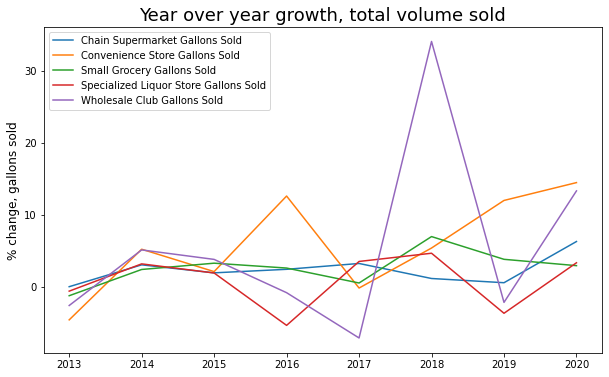

In [30]:
new3.plot(figsize = (10, 6))
plt.ylabel('% change, gallons sold', fontsize = 12)
plt.title('Year over year growth, total volume sold', fontsize = 18)
plt.legend(loc='upper left')
